In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [20]:
#metropolice
def P(r, a = 0.5):
    return np.exp(-a*r)

def Q(r, r0 ,l= 1 ):
    return np.exp(-l* (r-r0) **3)

def Metropolis(N, P, Q, a):
    m = []
    for j in range(100):
      x = np.random.uniform(0,1)
      y = np.random.uniform(0,1)
      z = np.random.uniform(0,1)
      r = np.sqrt(x**2 + y**2 + z**2)

      for i in range(N//100):
          X = np.random.uniform(-1,1)
          Y = np.random.uniform(-1,1)
          Z = np.random.uniform(-1,1)
          R = r +  np.sqrt(X**2 + Y**2 + Z**2)

          w = (P(R, a) / (P(r, a)))

          al = min(1, w)
          s = np.random.rand()
          if  s <= al:
              m.append(R)
          else:
              m.append(r)
    return m


In [41]:
n = 1000
bins = 50
r = np.linspace(0, 10, 100)
m = Metropolis(n, P, Q , 0.7)

No handles with labels found to put in legend.


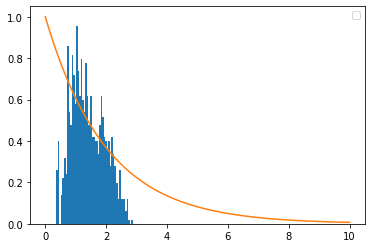

In [42]:
plt.hist(m, bins = bins,  density = True)
plt.plot(r, P(r, 0.5))
plt.legend()
plt.show()

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [3]:
# Your code here

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [4]:
# Your code here

# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [43]:
from scipy.fft import fft, fftshift, fftfreq

In [44]:
n = 1000
ti = 0    #s
tf = 20   #s
T = np.linspace(ti, tf, n)
def x(T):
    return (2*np.sin(T)) + (np.sin(10*T))

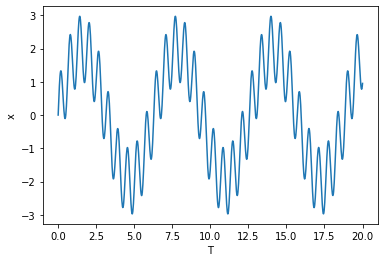

In [45]:
plt.plot(T, x(T))
plt.xlabel('T')
plt.ylabel('x')
plt.show()

In [46]:
yf = fft(x(T))
xf = fftfreq(n, d = T[1] - T[0])[ 0 : n//2 ]

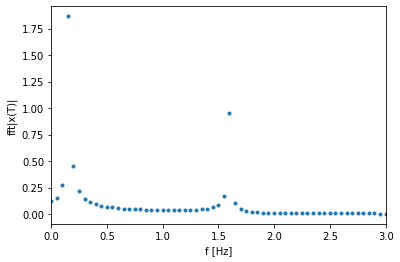

In [47]:
plt.plot(xf , (2/n)*np.abs(yf[0 : n//2]), ".")
plt.xlim(0,3)
plt.xlabel('f [Hz]')
plt.ylabel('fft|x(T)|')
plt.show()

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

In [48]:
# Answer here

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [49]:
from scipy.signal import sawtooth

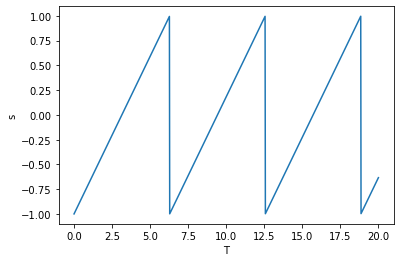

In [50]:
plt.plot(T, sawtooth(T))
plt.xlabel('T')
plt.ylabel('s')
plt.show()

In [51]:
yf = fft(sawtooth(T))
xf = fftfreq(n, d = T[1] - T[0])[0 : n//2]

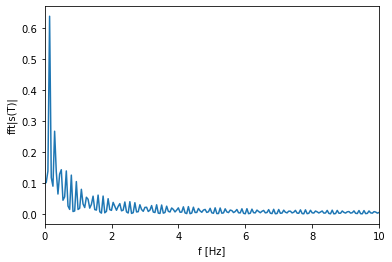

In [52]:
plt.plot(xf, (2/n)*np.abs(yf[ 0 :n//2]))
plt.xlim(0, 10)
plt.xlabel('f [Hz]')
plt.ylabel('fft|s(T)|')
plt.show()

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [53]:
import pandas as pd

In [54]:
Sunspot = pd.read_csv('/content/Sunspots.csv', index_col=0)
Sunspot

,Date,Monthly
Num,,
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0


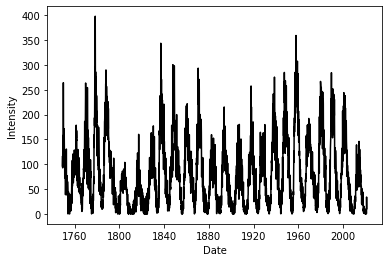

In [55]:
date = pd.to_datetime(Sunspot.Date)

plt.plot(date, Sunspot['Monthly'], c = 'black')
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.show()

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

In [56]:
x = list(range(len(Sunspot.Date)))
y = Sunspot.Monthly

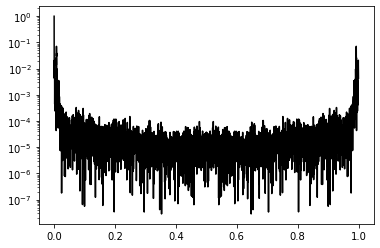

In [57]:

#fast fourier transform and take absolute values
f = abs(np.fft.fft(y))

#get the list of frequencies
num = np.size(x)
freq = [i / num for i in list(range(num))]

#get the list of spectrums
spectrum = f.real*f.real + f.imag*f.imag
nspectrum = spectrum/spectrum[0]

#plot nspectrum per frequency
plt.semilogy(freq,nspectrum, c = 'black')

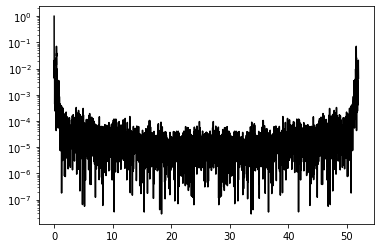

In [58]:
#period
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/52)
plt.semilogy(results['period'], results['nspectrum'], c = 'black')

In [59]:
period = 1/results['freq'] 
period

0               inf
1       3265.000000
2       1632.500000
3       1088.333333
4        816.250000
           ...     
3260       1.001534
3261       1.001227
3262       1.000920
3263       1.000613
3264       1.000306
Name: freq, Length: 3265, dtype: float64

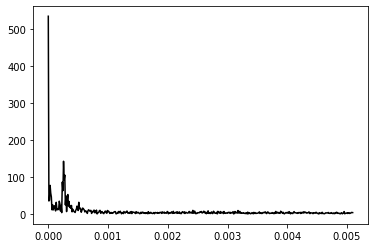

In [60]:
#period
yf = fft(Sunspot.Monthly.to_numpy())
xf = fftfreq(3265 , d= 30)[0:n//2]
plt.plot(xf, (2/n)*np.abs(yf[0:n//2]),  c = 'black')
plt.show()

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [61]:
from scipy.fft import ifft

In [62]:
Sunspot.Date

Num
0       1749-01-31
1       1749-02-28
2       1749-03-31
3       1749-04-30
4       1749-05-31
           ...    
3260    2020-09-30
3261    2020-10-31
3262    2020-11-30
3263    2020-12-31
3264    2021-01-31
Name: Date, Length: 3265, dtype: object

In [63]:
Sunspot.Monthly

Num
0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
3260      0.6
3261     14.4
3262     34.0
3263     21.8
3264     10.4
Name: Monthly, Length: 3265, dtype: float64

In [64]:
fft(Sunspot.Monthly.to_numpy())

array([267007.7           -0.j        ,   7532.68481429+15868.49731631j,
        -9485.36499832+16054.06182767j, ...,
        -5146.14368204+38248.48932729j,  -9485.36499832-16054.06182767j,
         7532.68481429-15868.49731631j])

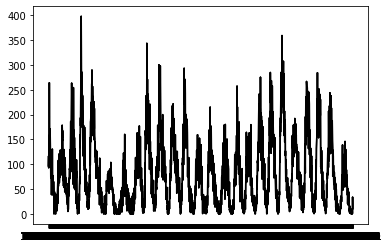

In [65]:
plt.plot(Sunspot.Date, Sunspot.Monthly, c = 'black')
plt.plot(Sunspot.Date, abs(ifft(fft(Sunspot.Monthly.to_numpy()))), c = 'black')
plt.show()

In [67]:
#as you see we have same results.

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [68]:
i = abs(yf)
i.sort()
i[-10:] = 0

In [69]:
j = ifft(i)

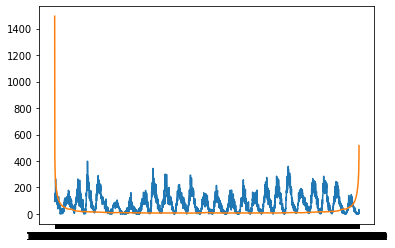

In [70]:
plt.plot(Sunspot.Date, Sunspot.Monthly)
plt.plot(Sunspot.Date, abs(j))
plt.show()

In [71]:
#the first ten biggest values are the main values that we have! if we remove them its like we dont have any values so we see as a line!

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [72]:
from scipy.fftpack import rfft, irfft, rfftfreq, ifftshift

In [73]:
data = pd.read_csv('/content/2pcf.txt',header= None)
data

,0
0,0.0000
1,-0.5803
2,-0.9645
3,-0.7912
4,-0.6154
...,...
99995,1.8084
99996,1.8084
99997,2.2739
99998,1.4093


In [74]:
data[0]

0        0.0000
1       -0.5803
2       -0.9645
3       -0.7912
4       -0.6154
          ...  
99995    1.8084
99996    1.8084
99997    2.2739
99998    1.4093
99999    1.4093
Name: 0, Length: 100000, dtype: float64

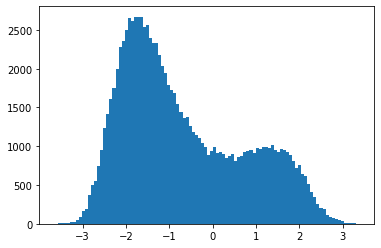

In [75]:
plt.hist(data[0], bins = 100, linewidth = 0)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


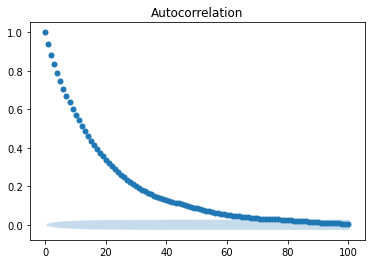

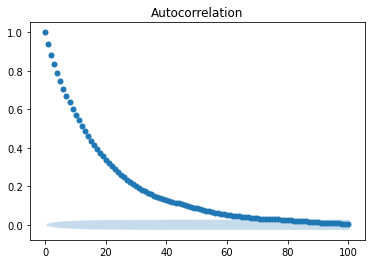

In [76]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(data, lags=100, use_vlines= False)
#nemidunam chera 2 bar plot mikone!

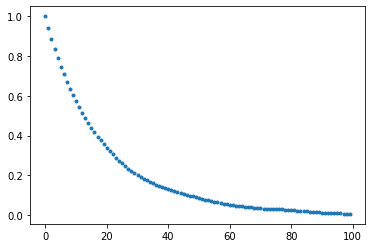

In [77]:
#autocorrelation using fourier
def autocorrelation(x):
    xp = ifftshift((x - np.average(x))/np.std(x))
    n, = xp.shape
    xp = np.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
    f = fft(xp)
    p = np.absolute(f)**2
    pi = ifft(p)
    return np.real(pi)[:n//2]/(np.arange(n//2)[::-1]+n//2)

u = autocorrelation(data[0].to_numpy())
plt.plot(x[:100], u[:100], '.')
plt.show()

In [78]:
#result is same as last result that we saw.

In [79]:
#power spectrum
power = fft(j)
f = fftfreq(j.size)
f = fftshift(f)
power_  = fftshift(power)

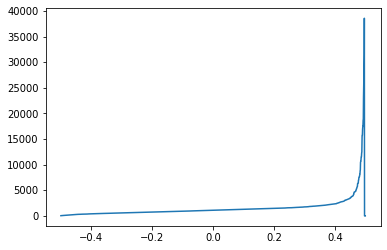

In [80]:
plt.plot(f, abs(power))
plt.show()

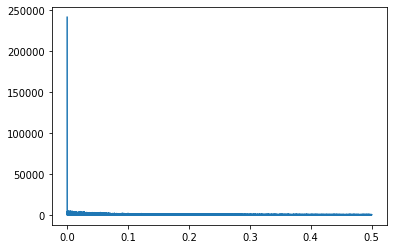

In [81]:
y = data[0].to_numpy()**2
yf = rfft(y)
xf = rfftfreq(len(data[0]))
plt.plot(xf, np.abs(yf))

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

In [83]:
CMB = np.load('/content/cmb_camb_N1024_PS12.npy')
CMB

array([[-58.86565019, -52.00479425, -45.52710632, ..., -81.6929155 ,
        -73.78002855, -66.13692367],
       [-55.94739134, -49.27693447, -43.07373188, ..., -78.91851077,
        -70.82681261, -63.13741826],
       [-54.47494619, -48.02817536, -42.09378046, ..., -77.28168017,
        -69.1433192 , -61.51249752],
       ...,
       [-75.58483339, -68.70942337, -61.74952149, ..., -95.43718643,
        -89.00184571, -82.36334943],
       [-68.92469854, -61.93094363, -55.0374856 , ..., -90.22468918,
        -83.139877  , -76.01144799],
       [-63.24349284, -56.26327424, -49.5423045 , ..., -85.53139564,
        -77.95155842, -70.48945155]])

In [ ]:
# Your answers here